In [1]:
# loading necessery packages #

using CSV
using DataFrames
using Clustering
using ElasticArrays
using DataStructures
using DecisionTree
using MLDataUtils 
using FreqTables
using PyPlot
using StatsPlots


# Data Import
Read a csv input (a filename given as a String, or any other IO source), returning a CSV.File object. Opens the file and uses passed arguments to detect the number of columns and column types. The returned CSV.File object supports the Tables.jl interface and can iterate CSV.Rows. CSV.Row supports propertynames and getproperty to access individual row values. Note that duplicate column names will be detected and adjusted to ensure uniqueness (duplicate column name a will become a_1).

CSV.read — Function:  CSV.read(fullpath::Union{AbstractString,IO}, sink=DataFrame; kwargs...) => typeof(sink)

Parses a delimited file into a Julia structure (a DataFrame by default, but any valid Tables.jl sink function can be provided).

In [2]:
# reading dataset 
dt = CSV.read("fraudData.csv")

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Int64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,9839.64,C1231006815,170136.0,1.60296e5,M1979787155,0.0,0.0,0,0,0,0,0,1,0
2,1,1864.28,C1666544295,21249.0,19384.7,M2044282225,0.0,0.0,0,0,0,0,0,1,0
3,1,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,0,0,0,0,1
4,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0,1,0,0,0
5,1,11668.1,C2048537720,41554.0,29885.9,M1230701703,0.0,0.0,0,0,0,0,0,1,0
6,1,7817.71,C90045638,53860.0,46042.3,M573487274,0.0,0.0,0,0,0,0,0,1,0
7,1,7107.77,C154988899,183195.0,1.76087e5,M408069119,0.0,0.0,0,0,0,0,0,1,0
8,1,7861.64,C1912850431,1.76087e5,1.68226e5,M633326333,0.0,0.0,0,0,0,0,0,1,0
9,1,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0,0,0,0,1,0


# Data Exploration

In this section, we explore the data



### Pring Size of dataset 
function size() returns the dimensionality of data, which shows that there are 6362620 Instances (or rows or records) and 
15 Features (or columns).

In [3]:
# size function returns the number of row and columns of the dataset
row, col = size(dt)
println("Number of Instances: ", row)
println("Number of Features: ", col)

Number of Instances: 6362620
Number of Features: 15


### List of features in training data

In [4]:
names(dt)

15-element Array{Symbol,1}:
 :step          
 :amount        
 :nameOrig      
 :oldbalanceOrg 
 :newbalanceOrig
 :nameDest      
 :oldbalanceDest
 :newbalanceDest
 :isFraud       
 :isFlaggedFraud
 :CASH_IN       
 :CASH_OUT      
 :DEBIT         
 :PAYMENT       
 :TRANSFER      

### Showing first 10 example and last 10 example

In [5]:
# printing first 10 example

first(dt,10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Int64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,9839.64,C1231006815,170136.0,1.60296e5,M1979787155,0.0,0.0,0,0,0,0,0,1,0
2,1,1864.28,C1666544295,21249.0,19384.7,M2044282225,0.0,0.0,0,0,0,0,0,1,0
3,1,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,0,0,0,0,1
4,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0,1,0,0,0
5,1,11668.1,C2048537720,41554.0,29885.9,M1230701703,0.0,0.0,0,0,0,0,0,1,0
6,1,7817.71,C90045638,53860.0,46042.3,M573487274,0.0,0.0,0,0,0,0,0,1,0
7,1,7107.77,C154988899,183195.0,1.76087e5,M408069119,0.0,0.0,0,0,0,0,0,1,0
8,1,7861.64,C1912850431,1.76087e5,1.68226e5,M633326333,0.0,0.0,0,0,0,0,0,1,0
9,1,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0,0,0,0,1,0


In [6]:
# Printing last 10 examples

last(dt, 10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Int64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,742,63417.0,C778071008,63417.0,0.0,C1812552860,0.0,0.0,1,0,0,0,0,0,1
2,742,63417.0,C994950684,63417.0,0.0,C1662241365,2.76433e5,3.3985e5,1,0,0,1,0,0,0
3,743,1.25882e6,C1531301470,1.25882e6,0.0,C1470998563,0.0,0.0,1,0,0,0,0,0,1
4,743,1.25882e6,C1436118706,1.25882e6,0.0,C1240760502,5.03465e5,1.76228e6,1,0,0,1,0,0,0
5,743,3.39682e5,C2013999242,3.39682e5,0.0,C1850423904,0.0,0.0,1,0,0,0,0,0,1
6,743,3.39682e5,C786484425,3.39682e5,0.0,C776919290,0.0,3.39682e5,1,0,0,1,0,0,0
7,743,6.31141e6,C1529008245,6.31141e6,0.0,C1881841831,0.0,0.0,1,0,0,0,0,0,1
8,743,6.31141e6,C1162922333,6.31141e6,0.0,C1365125890,68488.8,6.3799e6,1,0,0,1,0,0,0
9,743,8.50003e5,C1685995037,8.50003e5,0.0,C2080388513,0.0,0.0,1,0,0,0,0,0,1


## Distribution of every features in dataset.

In [7]:
println(describe(dt))

15×8 DataFrame
│ Row │ variable       │ mean       │ min         │ median    │ max        │ nunique │ nmissing │ eltype   │
│     │ Symbol         │ Union…     │ Any         │ Union…    │ Any        │ Union…  │ Int64    │ DataType │
├─────┼────────────────┼────────────┼─────────────┼───────────┼────────────┼─────────┼──────────┼──────────┤
│ 1   │ step           │ 243.397    │ 1           │ 239.0     │ 743        │         │ 0        │ Int64    │
│ 2   │ amount         │ 1.79862e5  │ 0.0         │ 74871.9   │ 9.24455e7  │         │ 0        │ Float64  │
│ 3   │ nameOrig       │            │ C1000000639 │           │ C999999784 │ 6353307 │ 0        │ String   │
│ 4   │ oldbalanceOrg  │ 8.33883e5  │ 0.0         │ 14208.0   │ 5.9585e7   │         │ 0        │ Float64  │
│ 5   │ newbalanceOrig │ 8.55114e5  │ 0.0         │ 0.0       │ 4.9585e7   │         │ 0        │ Float64  │
│ 6   │ nameDest       │            │ C1000004082 │           │ M999999784 │ 2722362 │ 0        │ String   │
│ 7 

## Histogram showing frequency distribution of non-fraud and fraud instances

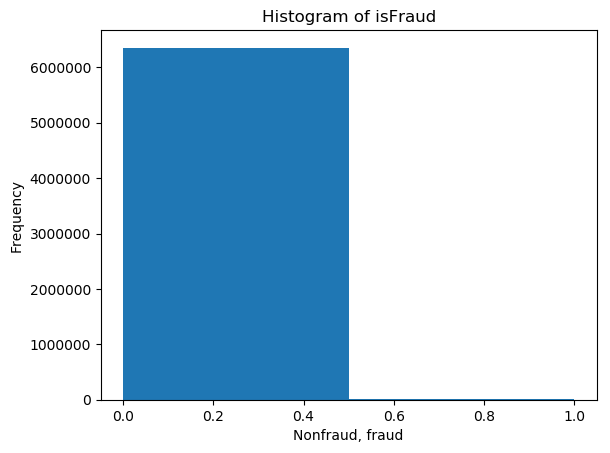

PyObject Text(24.0, 0.5, 'Frequency')

In [8]:
h = PyPlot.plt.hist(dt[:isFraud], 2) 
plt.title("Histogram of isFraud")
plt.xlabel("Nonfraud, fraud")
plt.ylabel("Frequency")


## Remove unnecessary column
As "nameOrig" and "nameDest" are not playing a vital role for a fraud transaction so we can delete these columns.

In [9]:
# Deleting String Type Feature 'nameOrig'
# Deleting String Type Feature 'nameDest'

dt = deletecols!(dt, :nameOrig)
dt = deletecols!(dt, :nameDest)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,9839.64,170136.0,1.60296e5,0.0,0.0,0,0,0,0,0,1,0
2,1,1864.28,21249.0,19384.7,0.0,0.0,0,0,0,0,0,1,0
3,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,0,1
4,1,181.0,181.0,0.0,21182.0,0.0,1,0,0,1,0,0,0
5,1,11668.1,41554.0,29885.9,0.0,0.0,0,0,0,0,0,1,0
6,1,7817.71,53860.0,46042.3,0.0,0.0,0,0,0,0,0,1,0
7,1,7107.77,183195.0,1.76087e5,0.0,0.0,0,0,0,0,0,1,0
8,1,7861.64,1.76087e5,1.68226e5,0.0,0.0,0,0,0,0,0,1,0
9,1,4024.36,2671.0,0.0,0.0,0.0,0,0,0,0,0,1,0


## Freqency distribution of isFraud column variables
0 represents non-fraudulant transaction 
1 represents fraud transaction


In [10]:
frequency_isFraud = freqtable(dt[:isFraud])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼────────
0     │ 6354407
1     │    8213

In [11]:
# Ration of non-fraud and fraud 
ratio = prop(frequency_isFraud)

2-element Named Array{Float64,1}
Dim1  │ 
──────┼───────────
0     │   0.998709
1     │ 0.00129082

In [12]:
first(dt, 5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,9839.64,170136.0,1.60296e5,0.0,0.0,0,0,0,0,0,1,0
2,1,1864.28,21249.0,19384.7,0.0,0.0,0,0,0,0,0,1,0
3,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,0,1
4,1,181.0,181.0,0.0,21182.0,0.0,1,0,0,1,0,0,0
5,1,11668.1,41554.0,29885.9,0.0,0.0,0,0,0,0,0,1,0


In [13]:
# Setting Random Seed 
using Random
Random.seed!(1234)

MersenneTwister(UInt32[0x000004d2], Random.DSFMT.DSFMT_state(Int32[-1393240018, 1073611148, 45497681, 1072875908, 436273599, 1073674613, -2043716458, 1073445557, -254908435, 1072827086  …  -599655111, 1073144102, 367655457, 1072985259, -1278750689, 1018350124, -597141475, 249849711, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

# Spliting the dataset
We spliting the dataset using the Class column ( "isFraud" ).

In "isFraud" there is two class value "0" & "1". We split the data into two part, those are
                        
                        1. minorityData (class value "1")
                        2. majorityData (class value "0")

In [14]:
#= 
Split dataset to minorityData where isFraud = 1
Split dataset to minorityData where isFraud = 0
=#
minorityData = dt[dt[:, 7] .== 1, :]
majorityData = dt[dt[:, 7] .== 0, :]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,9839.64,170136.0,1.60296e5,0.0,0.0,0,0,0,0,0,1,0
2,1,1864.28,21249.0,19384.7,0.0,0.0,0,0,0,0,0,1,0
3,1,11668.1,41554.0,29885.9,0.0,0.0,0,0,0,0,0,1,0
4,1,7817.71,53860.0,46042.3,0.0,0.0,0,0,0,0,0,1,0
5,1,7107.77,183195.0,1.76087e5,0.0,0.0,0,0,0,0,0,1,0
6,1,7861.64,1.76087e5,1.68226e5,0.0,0.0,0,0,0,0,0,1,0
7,1,4024.36,2671.0,0.0,0.0,0.0,0,0,0,0,0,1,0
8,1,5337.77,41720.0,36382.2,41898.0,40348.8,0,0,0,0,1,0,0
9,1,9644.94,4465.0,0.0,10845.0,1.57982e5,0,0,0,0,1,0,0


In [15]:
# printing size of minorityData

println("Instances of Minority Data: ", nrow(minorityData))
println("Features of Minority Data: ", ncol(minorityData))

Instances of Minority Data: 8213
Features of Minority Data: 13


In [16]:
# printing size of majorityData
println("Instances of Majority Data: ", nrow(majorityData))
println("Features of Majority Data: ", ncol(majorityData))

Instances of Majority Data: 6354407
Features of Majority Data: 13


In [17]:
# This function splits minority data in given ratio
function split_MinorityData(min_data, ratio)
    minority_mat = convert(Array, min_data[1:13])
    min_trainShuf = shuffleobs(transpose(minority_mat))
    (min_train, min_test) = splitobs(min_trainShuf, at =ratio)
    min_train = Array(transpose(min_train))
    min_test = Array(transpose(min_test))
    return min_train, min_test
end 

split_MinorityData (generic function with 1 method)

# Split MinorityData
For bulid a independent test data we split the MinorityData into 70% and 30%.

We keep 70% for train and 30% for test dataset.

In [18]:
# Split minorityData for train an test 
min_train, min_test = split_MinorityData(minorityData, .70)
println(size(min_train))
println(size(min_test))


┌ Warning: `convert(::Type{Array}, df::AbstractDataFrame)` is deprecated, use `convert(Matrix, df)` instead.
│   caller = split_MinorityData(::DataFrame, ::Float64) at In[17]:3
└ @ Main ./In[17]:3


(5749, 13)
(2464, 13)


In [19]:
min_train

5749×13 Array{Union{Missing, Float64},2}:
 326.0       4.24963e5       4.24963e5  …  1.0  0.0  0.0  0.0  0.0  0.0  1.0
 728.0       6.3224e6        6.3224e6      1.0  0.0  0.0  0.0  0.0  0.0  1.0
 641.0    2205.55         2205.55          1.0  0.0  0.0  0.0  0.0  0.0  1.0
 434.0   32671.9         32671.9           1.0  0.0  0.0  0.0  0.0  0.0  1.0
 531.0       8.34204e5       8.34204e5     1.0  0.0  0.0  1.0  0.0  0.0  0.0
 631.0       2.39161e6       2.39161e6  …  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 373.0       4.29468e6       4.29468e6     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 143.0       1.82275e6       1.82275e6     1.0  0.0  0.0  1.0  0.0  0.0  0.0
 291.0       2.32491e6       2.32491e6     1.0  0.0  0.0  1.0  0.0  0.0  0.0
 612.0       1.02319e6       1.02319e6     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 324.0       3.62837e5       3.62837e5  …  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 365.0   31315.5         31315.5           1.0  0.0  0.0  1.0  0.0  0.0  0.0
 496.0   30172.0         30172.0  

In [20]:
maj_mat = convert(Matrix{Float64}, majorityData[1:13])

6354407×13 Array{Float64,2}:
   1.0   9839.64       170136.0        …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   1864.28        21249.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0  11668.1         41554.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   7817.71        53860.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   7107.77       183195.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   7861.64            1.76087e5  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   4024.36         2671.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   5337.77        41720.0           0.0  0.0  0.0  0.0  1.0  0.0  0.0
   1.0   9644.94         4465.0           0.0  0.0  0.0  0.0  1.0  0.0  0.0
   1.0   3099.97        20771.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   2560.74         5070.0        …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0  11633.8         10127.0           0.0  0.0  0.0  0.0  0.0  1.0  0.0
   1.0   4098.78       503264.0           0.0  0.0  0.0  0.

In [21]:
# converting DataFrame to Matrix and fliping dimension 
# because Clustering.jl package takes in this form

majorityData_mat = permutedims(maj_mat, [2, 1])

13×6354407 Array{Float64,2}:
      1.0            1.0       1.0      1.0   …    718.0     718.0     
   9839.64        1864.28  11668.1   7817.71     82096.4    1864.24    
 170136.0        21249.0   41554.0  53860.0      13492.0   20426.0     
      1.60296e5  19384.7   29885.9  46042.3          0.0   18561.8     
      0.0            0.0       0.0      0.0          0.0  188746.0     
      0.0            0.0       0.0      0.0   …  82096.4       1.9061e5
      0.0            0.0       0.0      0.0          0.0       0.0     
      0.0            0.0       0.0      0.0          0.0       0.0     
      0.0            0.0       0.0      0.0          0.0       0.0     
      0.0            0.0       0.0      0.0          0.0       0.0     
      0.0            0.0       0.0      0.0   …      0.0       1.0     
      1.0            1.0       1.0      1.0          0.0       0.0     
      0.0            0.0       0.0      0.0          1.0       0.0     

# Clustering
Running k-means clustering using k = 5 and max iteration 1000.

In [22]:
# running kmeans clustering using k = 5
k = 5

result = kmeans(majorityData_mat, k; maxiter = 1000, display = :iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       7.931844e+19
      1       7.097583e+19      -8.342615e+18 |        5
      2       6.989430e+19      -1.081531e+18 |        5
      3       6.941902e+19      -4.752734e+17 |        5
      4       6.912213e+19      -2.968918e+17 |        5
      5       6.889818e+19      -2.239522e+17 |        5
      6       6.869452e+19      -2.036567e+17 |        5
      7       6.850030e+19      -1.942245e+17 |        5
      8       6.830870e+19      -1.915946e+17 |        5
      9       6.811035e+19      -1.983489e+17 |        5
     10       6.792287e+19      -1.874876e+17 |        5
     11       6.774288e+19      -1.799825e+17 |        5
     12       6.757774e+19      -1.651443e+17 |        5
     13       6.742832e+19      -1.494185e+17 |        5
     14       6.730127e+19      -1.270530e+17 |        5
     15       6.719190e+19      -1.093663e+17 |        

KmeansResult{Array{Float64,2},Float64,Int64}([242.808 237.652 … 249.015 290.237; 1.41196e5 1.60333e5 … 5.06892e5 2.18474e6; … ; 0.383817 0.000285857 … 0.0 0.0; 0.0743748 4.76429e-5 … 0.239177 0.33019], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [5.69408e11, 6.7804e11, 6.60296e11, 6.47895e11, 5.64048e11, 5.66883e11, 6.97648e11, 5.78064e11, 5.34149e11, 6.78846e11  …  6.90104e11, 3.8873e11, 6.99904e11, 2.09735e11, 6.95314e11, 6.57836e11, 5.26504e11, 4.06876e11, 5.91948e11, 3.62782e11], [5605297, 293853, 1702, 423866, 29689], [5605297, 293853, 1702, 423866, 29689], 6.678946789396542e19, 63, true)

In [23]:
size(majorityData_mat)

(13, 6354407)

In [24]:
M = result.centers  

#dmat = pairwise( SqEuclidean(), majorityData_mat) ## Equivalent to pairwise(distance, data_matrix, data_matrix)
#dmat = convert(Array{T} where T <: AbstractFloat, dmat) 
#size(dmat)


13×5 Array{Float64,2}:
    242.808       237.652        358.147       249.015       290.237     
      1.41196e5     1.60333e5      8.26173e6     5.06892e5     2.18474e6 
      2.69041e5     1.19105e7      9.88878e5     5.87292e5     1.12874e6 
      2.84482e5     1.20707e7      1.01859e6     6.16509e5     1.16197e6 
 465413.0           1.53007e6      1.12168e8     6.97442e6     2.67222e7 
      5.57081e5     1.38626e6      1.21477e8     7.47361e6     2.9612e7  
      0.0           0.0            0.0           0.0           0.0       
      0.0           0.0            0.0           0.0           0.0       
      0.176635      0.999585       0.23443       0.253207      0.260602  
      0.35848       8.16735e-5     0.331375      0.498967      0.401226  
      0.00669242    0.0            0.00940071    0.00864896    0.00798275
      0.383817      0.000285857    0.0           0.0           0.0       
      0.0743748     4.76429e-5     0.424794      0.239177      0.33019   

# View the size of the each Cluster

In [25]:
# size of each cluster out of k

c = counts(result) 

5-element Array{Int64,1}:
 5605297
  293853
    1702
  423866
   29689

## Clusters that only contines more than or equal 8213 instances

In [26]:
# we need clusters that only contines more than or equal 8213 instances

global j = 1
global cluster_list = []
global clusterNumber = 0
for i in c
    if i >= 8213
        println(j, "th Cluster Contains: ", i)
        clusterNumber = clusterNumber + 1 
        push!(cluster_list, j)
    end
    j = j + 1
end
println("Usable Cluster: ", clusterNumber)
println(cluster_list)

1th Cluster Contains: 5605297
2th Cluster Contains: 293853
4th Cluster Contains: 423866
5th Cluster Contains: 29689
Usable Cluster: 4
Any[1, 2, 4, 5]


In [27]:
# obtain the resultant assignments
# a[i] indicates which cluster the i-th sample is assigned to

cluster_no = assignments(result)

6354407-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [28]:
# Number of row and column in features Matrix
global majority_sz = 6354407
row, col = size(majorityData_mat)
println(col)

6354407


In [29]:
# This function returns minoity instances in elastic array [ just a helper function ]
function collectMinority(min)
    
    row, col = size(min)
    
    temp = ElasticArray{Float64}(undef, 13, 0)
    
    for i = 1 : row
        r = min[i, :]
        append!(temp, r)    
    end
    return temp
    #return reshape(temp, row, col)
end

collectMinority (generic function with 1 method)

In [30]:
# It's a helper function that takes cluster number as parameter 
# and returns all the instances belongs to this cluster

function collectClusteredData(cl_no)
    
    temp = ElasticArray{Float64}(undef, 13, 0)
    
    for i = 1 : majority_sz
        if cluster_no[i] == cl_no
            append!(temp, majorityData_mat[:, i])
        end
    end
    
    return temp
end

collectClusteredData (generic function with 1 method)

In [31]:
# It's a helper function that returns cluster member of a perticular cluster

function getElem(cluster, i)
    st_idx = (i - 1) * 13 + 1
    en_idx = st_idx + 13 - 1
    return cluster[st_idx : en_idx]
end

getElem (generic function with 1 method)

In [32]:
# this function takes cluster number and sample size as parameter 
# and returns n-random sample from that cluster 

function randSample(cluster, sample_sz)
    row, col = size(cluster)
    idxs = rand(1:col, sample_sz)
    
    rnd_sample = ElasticArray{Float64}(undef, 13, 0)
    
    for i = 1 : sample_sz
        sample = getElem(cluster, idxs[i])
        append!(rnd_sample, sample)
    end
        
    return  rnd_sample#reshape(rnd_sample,sample_sz, row)
end

randSample (generic function with 1 method)

In [33]:
# This function merge both minoirty and majority sub data in given sample size
function mergeMajorityMinority(majority, minority, sample_sz)
    return hcat(majority, minority)
end

mergeMajorityMinority (generic function with 1 method)

In [34]:
# cluster_list array has the usable cluster indexes 
println(cluster_list)

Any[1, 2, 4, 5]


## Collecting cluster members 

In [35]:
# Usable clusters, decided in the previousStep

c1 = collectClusteredData(cluster_list[1])
c2 = collectClusteredData(cluster_list[2])
c3 = collectClusteredData(cluster_list[3])
c4 = collectClusteredData(cluster_list[4])


13×29689 ElasticArray{Float64,2,1}:
 1.0        1.0             1.0        …  718.0         718.0      
 3.49506e5  2.22711e5  227478.0             1.73137e5     1.39144e5
 7.33024e6  2.41907e6   25743.8            95.0        7075.0      
 7.67974e6  2.64178e6       0.0             0.0           0.0      
 1.7001e7   1.66515e7       1.64288e7       2.96365e7     4.90402e7
 1.91692e7  1.91692e7       1.91692e7  …    2.98096e7     4.91793e7
 0.0        0.0             0.0             0.0           0.0      
 0.0        0.0             0.0             0.0           0.0      
 1.0        1.0             0.0             0.0           0.0      
 0.0        0.0             1.0             0.0           0.0      
 0.0        0.0             0.0        …    0.0           0.0      
 0.0        0.0             0.0             0.0           0.0      
 0.0        0.0             0.0             1.0           1.0      

In [36]:
# min_train and min_test are converted to elastic array. 
min_trains =  collectMinority(min_train)
min_tests =  collectMinority(min_test)

13×2464 ElasticArray{Float64,2,1}:
   496.0    530.0          184.0  646.0    …  259.0          74.0      
 30172.0  19577.0        73486.8    1.0e7       1.95037e6     2.45142e6
 30172.0  19577.0        73486.8    1.0e7       1.95037e6     2.45142e6
     0.0      0.0            0.0    0.0         0.0           0.0      
     0.0      7.62609e5      0.0    0.0         3.3131e5   4870.65     
     0.0      7.82186e5      0.0    1.0e7  …    2.28168e6     2.45629e6
     1.0      1.0            1.0    1.0         1.0           1.0      
     0.0      0.0            0.0    0.0         0.0           0.0      
     0.0      0.0            0.0    0.0         0.0           0.0      
     0.0      1.0            0.0    1.0         1.0           1.0      
     0.0      0.0            0.0    0.0    …    0.0           0.0      
     0.0      0.0            0.0    0.0         0.0           0.0      
     1.0      0.0            1.0    0.0         0.0           0.0      

In [37]:
print("Size of minority_train: ", size(min_train))
print("Size of minority_test: ", size(min_test))


Size of minority_train: (5749, 13)Size of minority_test: (2464, 13)

In [38]:
# This function rename given dataframe
function renameDf(df)
 
col_name = [:step,          
 :amount,        
 :oldbalanceOrg, 
 :newbalanceOrig,
 :oldbalanceDest,
 :newbalanceDest,
 :isFraud,       
 :isFlaggedFraud,
 :CASH_IN,       
 :CASH_OUT,      
 :DEBIT,         
 :PAYMENT,       
 :TRANSFER]
 return names!(df, col_name)
    
end

renameDf (generic function with 1 method)

In [39]:
function PrepareSampledDataset(cluster, minority_sample, sample_sz)

    picked_sample = randSample(cluster, sample_sz)
    temp_dataset  = mergeMajorityMinority(picked_sample, minority_sample, sample_sz)
    
    features_sz, msamples_sz = size(temp_dataset)
    
    to_dataframe   = convert(DataFrame, temp_dataset)
    transposed_mat = permutedims(convert(Matrix{Float64}, to_dataframe[1:msamples_sz]), [2, 1])

    
    to_dataframe   = convert(DataFrame, transposed_mat)
    #df = to_dataframe.sample(frac=1).reset_index(drop=True)
    dataframe_shuffle = to_dataframe[StatsBase.sample(1:size(to_dataframe,1), size(to_dataframe,1), replace=false),:]
    
    return renameDf(dataframe_shuffle)
    
end

PrepareSampledDataset (generic function with 1 method)

## Declare sample size of majority sample for train and test

In [40]:
majority_sample_train = 8623
majority_sample_test = 5749


5749

# Merging Cluster data, minoirty sub data for creating samples for train and test

In [41]:
# 7 sample for training

using StatsBase

sample1_c1 = PrepareSampledDataset(c1, min_trains, majority_sample_train)
sample2_c1 = PrepareSampledDataset(c1, min_trains, majority_sample_train)
sample3_c1 = PrepareSampledDataset(c1, min_trains, majority_sample_train)


sample1_c2 = PrepareSampledDataset(c2, min_trains, majority_sample_train)
sample2_c2 = PrepareSampledDataset(c2, min_trains, majority_sample_train)

sample1_c3 = PrepareSampledDataset(c3, min_trains, majority_sample_train)
sample2_c3 = PrepareSampledDataset(c3, min_trains, majority_sample_train)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,69.0,2.96025e6,2.96025e6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,274.0,3.14112e5,0.0,0.0,4.11372e6,4.42783e6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,652.0,80397.9,80397.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,380.0,2.27907e5,0.0,0.0,3.88945e6,4.11736e6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,230.0,2.14692e5,0.0,0.0,1.17875e7,1.20022e7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,402.0,1.27156e5,1.27156e5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,520.0,1.45918e6,1.45918e6,0.0,1.1206e6,2.57978e6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,333.0,5735.9,7215.0,1479.1,1.35661e7,1.35718e7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,651.0,1.30777e5,1.30777e5,0.0,0.0,1.30777e5,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
# sample for test
sample1_c4_test = PrepareSampledDataset(c4, min_tests, majority_sample_test)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,324.0,3.60408e6,0.0,0.0,1.90715e7,2.26756e7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,297.0,1.00385e7,0.0,0.0,1.48123e7,2.48508e7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,164.0,48899.4,5.9452e5,6.43419e5,2.06202e7,2.05713e7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,228.0,63463.8,0.0,0.0,2.04009e7,2.04644e7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,372.0,2.16955e5,51689.0,0.0,3.38761e7,3.40931e7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,148.0,3.94886e5,3.94886e5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,397.0,3.43814e5,7.46364e6,7.80745e6,1.80353e7,1.76915e7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,359.0,86974.3,2.0978e7,2.10649e7,5.56062e7,5.55192e7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,371.0,7.98773e6,0.0,0.0,3.10661e7,3.90538e7,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Writing all the created samples for train and test as csv using CSV.write function 

In [43]:
CSV.write("sample1_c1.csv", sample1_c1)
CSV.write("sample2_c1.csv", sample2_c1)
CSV.write("sample3_c1.csv", sample3_c1)

CSV.write("sample1_c2.csv", sample1_c2)
CSV.write("sample2_c2.csv", sample2_c2)

CSV.write("sample1_c3.csv", sample1_c3)
CSV.write("sample2_c3.csv", sample2_c3)

"sample2_c3.csv"

In [44]:
CSV.write("sample1_c4_test.csv", sample1_c4_test)

"sample1_c4_test.csv"

# ScikitLearn
#### ScikitLearn.jl provides a uniform interface for training and using models, as well as a set of tools for chaining (pipelines), evaluating, and tuning model hyperparameters.

To install ScikitLearn.jl, type ]add ScikitLearn at the REPL.

To import Python models (optional), ScikitLearn.jl requires the scikit-learn Python library, which will be installed automatically when needed. Most of the examples use PyPlot.jl


In [45]:
IJulia.installkernel("Julia nodeps", "--depwarn=no")


┌ Info: Installing Julia nodeps kernelspec in /home/tarik/.local/share/jupyter/kernels/julia-nodeps-1.1
└ @ IJulia /home/tarik/.julia/packages/IJulia/4UizY/deps/kspec.jl:72


"/home/tarik/.local/share/jupyter/kernels/julia-nodeps-1.1"

In [46]:
 using ScikitLearn: fit!, predict, @sk_import, fit_transform! 
 import ScikitLearn: CrossValidation 
 @sk_import metrics: accuracy_score 
 @sk_import ensemble: RandomForestClassifier 
 @sk_import metrics: (confusion_matrix, f1_score, classification_report, precision_score, recall_score)


┌ Info: Recompiling stale cache file /home/tarik/.julia/compiled/v1.1/ScikitLearn/tbUuI.ji for ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1184
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore /home/tarik/.julia/packages/ScikitLearn/HK6Vs/src/Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core /home/tarik/.julia/packages/ScikitLearn/HK6Vs/src/Skcore.jl:158
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core /h

PyObject <function recall_score at 0x7fb3bde23840>

# Import the train and test sample 

In [47]:
sample1_c1 = CSV.read("sample1_c1.csv")
sample2_c1 = CSV.read("sample2_c1.csv")
sample3_c1 = CSV.read("sample3_c1.csv")

sample1_c2 = CSV.read("sample1_c2.csv")
sample2_c2 = CSV.read("sample2_c2.csv")

sample1_c3 = CSV.read("sample1_c3.csv")
sample2_c3 = CSV.read("sample2_c3.csv")

sample1_c4_test = CSV.read("sample1_c4_test.csv")

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,324.0,3.60408e6,0.0,0.0,1.90715e7,2.26756e7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,297.0,1.00385e7,0.0,0.0,1.48123e7,2.48508e7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,164.0,48899.4,5.9452e5,6.43419e5,2.06202e7,2.05713e7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,228.0,63463.8,0.0,0.0,2.04009e7,2.04644e7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,372.0,2.16955e5,51689.0,0.0,3.38761e7,3.40931e7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,148.0,3.94886e5,3.94886e5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,397.0,3.43814e5,7.46364e6,7.80745e6,1.80353e7,1.76915e7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,359.0,86974.3,2.0978e7,2.10649e7,5.56062e7,5.55192e7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,371.0,7.98773e6,0.0,0.0,3.10661e7,3.90538e7,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
frequency_isFraud = freqtable(sample1_c1[:isFraud])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0.0   │ 8623
1.0   │ 5749

## Size of a sample for train 

In [49]:
row, col = size(sample1_c1)
println("Number of Instances in training sub-sample: ", row)
println("Number of features  in training sub-sample: ", col)

Number of Instances in training sub-sample: 14372
Number of features  in training sub-sample: 13


## Freqency distribution of isFraud column variables
0 represents non-fraudulant transaction 
1 represents fraud transaction

In [50]:
frequency_isFraud = freqtable(sample1_c1[:isFraud])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0.0   │ 8623
1.0   │ 5749

## Histogram showing frequency distribution of non-fraud and fraud instances in Training


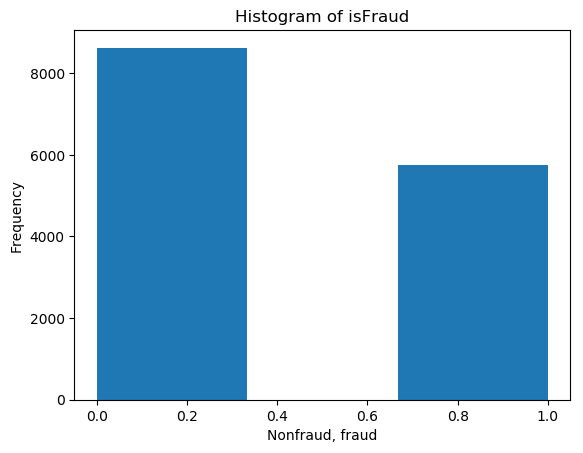

PyObject Text(24.0, 0.5, 'Frequency')

In [51]:
h = PyPlot.plt.hist(sample1_c1[:isFraud], 3) 
plt.title("Histogram of isFraud")
plt.xlabel("Nonfraud, fraud")
plt.ylabel("Frequency")



In [52]:
# Ratio of non-fraud and fraud in training 
ratio = prop(frequency_isFraud)
println("Non-Fraud and Fraud ratio in training sub-sample: ", round(ratio[1]*1000)," : ", round(ratio[2]*1000))

Non-Fraud and Fraud ratio in training sub-sample: 600.0 : 400.0


In [53]:
# Size of a sample for test set 
row, col = size(sample1_c4_test)
println("Number of Instances in test sub-sample: ", row)
println("Number of features  in test sub-sample: ", col)

Number of Instances in test sub-sample: 8213
Number of features  in test sub-sample: 13


In [54]:
frequency_isFraud = freqtable(sample1_c4_test[:isFraud])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0.0   │ 5749
1.0   │ 2464

## Histogram showing frequency distribution of non-fraud and fraud instances in Training


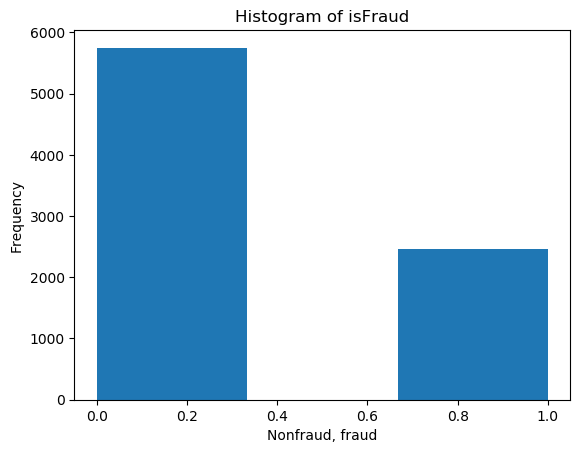

PyObject Text(24.0, 0.5, 'Frequency')

In [55]:
h = PyPlot.plt.hist(sample1_c4_test[:isFraud], 3) 
plt.title("Histogram of isFraud")
plt.xlabel("Nonfraud, fraud")
plt.ylabel("Frequency")


In [56]:
# Ratio of non-fraud and fraud in testing 

ratio = prop(frequency_isFraud)
println("Non-Fraud and Fraud ratio in training sub-sample: ", round(ratio[1]*1000)," : ", round(ratio[2]*1000))

Non-Fraud and Fraud ratio in training sub-sample: 700.0 : 300.0


# Preparing samples for Classifiers
    1. Seperate features from and target class 
    2. Convert dataframes into Matrix 

In [57]:
# Features for Training
features = [:step,:amount,:oldbalanceOrg,:newbalanceOrig,:oldbalanceDest,:newbalanceDest,
:isFlaggedFraud,:CASH_IN,:CASH_OUT,:DEBIT,:PAYMENT, :TRANSFER,]

Xfeat_samp1_c1 = convert(Matrix, sample1_c1[features])
Xfeat_samp2_c1 = convert(Matrix, sample2_c1[features])
Xfeat_samp3_c1 = convert(Matrix, sample3_c1[features])
Xfeat_samp1_c2 = convert(Matrix,sample1_c2[features])
Xfeat_samp2_c2 = convert(Matrix,sample2_c2[features])
Xfeat_samp1_c3 = convert(Matrix, sample1_c3[features])
Xfeat_samp2_c3 = convert(Matrix, sample2_c3[features])

Xfeat_samp1_c4_test = convert(Matrix, sample1_c4_test[features])


8213×12 Array{Union{Missing, Float64},2}:
 324.0      3.60408e6      0.0        …  0.0  0.0  0.0  0.0  0.0  1.0
 297.0      1.00385e7      0.0           0.0  0.0  0.0  0.0  0.0  1.0
 164.0  48899.4            5.9452e5      0.0  1.0  0.0  0.0  0.0  0.0
 228.0  63463.8            0.0           0.0  0.0  1.0  0.0  0.0  0.0
 372.0      2.16955e5  51689.0           0.0  0.0  1.0  0.0  0.0  0.0
 148.0      3.94886e5      3.94886e5  …  0.0  0.0  0.0  0.0  0.0  1.0
 397.0      3.43814e5      7.46364e6     0.0  1.0  0.0  0.0  0.0  0.0
 359.0  86974.3            2.0978e7      0.0  1.0  0.0  0.0  0.0  0.0
 371.0      7.98773e6      0.0           0.0  0.0  0.0  0.0  0.0  1.0
 304.0      4.73295e5      3.36654e6     0.0  1.0  0.0  0.0  0.0  0.0
 569.0      1.77991e5      0.0        …  0.0  0.0  0.0  0.0  0.0  1.0
  43.0   6305.71           5.13931e5     0.0  1.0  0.0  0.0  0.0  0.0
 524.0  91911.4            0.0           0.0  0.0  1.0  0.0  0.0  0.0
   ⋮                                  ⋱         

In [58]:
Ylabel_samp1_c1 = convert(Array, sample1_c1[:isFraud])
Ylabel_samp2_c1 = convert(Array, sample2_c1[:isFraud])
Ylabel_samp3_c1 = convert(Array, sample3_c1[:isFraud])
Ylabel_samp1_c2  = convert(Array, sample1_c2[:isFraud])
Ylabel_samp2_c2  = convert(Array, sample2_c2[:isFraud])
Ylabel_samp1_c3 = convert(Array, sample1_c3[:isFraud])
Ylabel_samp2_c3 = convert(Array, sample2_c3[:isFraud])

Ylabel_samp1_c4_test = convert(Array, sample1_c4_test[:isFraud])

8213-element Array{Union{Missing, Float64},1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 1.0

## Building 7 Random Forest classifiers with 7 sample data 

model    =   build_forest(labels, features,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase)


In [59]:
model1 = build_forest(Ylabel_samp1_c1, Xfeat_samp1_c1, 5, 100, 0.5, 10)
model2 = build_forest(Ylabel_samp2_c1, Xfeat_samp2_c1, 5, 100, 0.5, 10)
model3 = build_forest(Ylabel_samp3_c1, Xfeat_samp3_c1, 5, 100, 0.5, 10)
model4 = build_forest(Ylabel_samp1_c2, Xfeat_samp1_c2, 5, 100, 0.5, 10)
model5 = build_forest(Ylabel_samp2_c2, Xfeat_samp2_c2, 5, 100, 0.5, 10)
model6 = build_forest(Ylabel_samp1_c3, Xfeat_samp1_c3, 5, 100, 0.5, 10)
model7 = build_forest(Ylabel_samp2_c3, Xfeat_samp1_c3, 5, 100, 0.5, 10)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 111.02
Avg Depth:  10.0

In [60]:
# packing all the models into a tuple 
all_models = (model1, model2, model3, model4, model5, model6, model7)

(Ensemble of Decision Trees
Trees:      100
Avg Leaves: 65.19
Avg Depth:  10.0, Ensemble of Decision Trees
Trees:      100
Avg Leaves: 66.87
Avg Depth:  10.0, Ensemble of Decision Trees
Trees:      100
Avg Leaves: 65.87
Avg Depth:  10.0, Ensemble of Decision Trees
Trees:      100
Avg Leaves: 3.58
Avg Depth:  2.37, Ensemble of Decision Trees
Trees:      100
Avg Leaves: 4.38
Avg Depth:  2.98, Ensemble of Decision Trees
Trees:      100
Avg Leaves: 35.05
Avg Depth:  10.0, Ensemble of Decision Trees
Trees:      100
Avg Leaves: 111.02
Avg Depth:  10.0)

## Function for ensembler classifier, that applies 7 random forest on test data

In [61]:
function ensemblerClassifier(Xfeatures_test, models)
    
    model1, model2, model3, model4, model5, model6, model7 = models
    predictions1 = apply_forest(model1, Xfeatures_test)
    predictions2 = apply_forest(model2, Xfeatures_test)
    predictions3 = apply_forest(model3, Xfeatures_test)
    predictions4 = apply_forest(model4, Xfeatures_test)
    predictions5 = apply_forest(model5, Xfeatures_test)
    predictions6 = apply_forest(model6, Xfeatures_test)
    predictions7 = apply_forest(model7, Xfeatures_test)


    predictions = (predictions1, predictions2, predictions3, predictions4, predictions5, predictions6, predictions7)
    
    sz = size(predictions7)
    prediction_rwo_sz = sz[1]

    majorityVoted_predictions = calcualteMajorityVote(predictions, prediction_rwo_sz)
    
    return majorityVoted_predictions
end

ensemblerClassifier (generic function with 1 method)

## Function that clalucate majority vote for ensembler 

In [62]:
function calcualteMajorityVote(predictions, len)
    majority_prediction = Float64[]
    predictions1, predictions2, predictions3, predictions4, predictions5,predictions6, predictions7  = predictions
    for i = 1 : len
       temp = predictions1[i] + predictions2[i] + predictions3[i] + predictions4[i] + predictions5[i] + predictions6[i]+ predictions7[i] 
        if temp > 3
            push!(majority_prediction, 1.0)
        else
            push!(majority_prediction, 0.0)
        end
        temp = 0
    end
    return majority_prediction
end

calcualteMajorityVote (generic function with 1 method)

In [63]:
# ensemblerClassifier function takes test data, and traning models as argument and return votted prediction set. 

votted_prediction = ensemblerClassifier(Xfeat_samp1_c4_test, all_models)

8213-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 1.0

In [64]:
function ensembler_result(votted_prediction, Ylabel_samp1_c4_test)
    acc = accuracy_score(votted_prediction, Ylabel_samp1_c4_test)
    p_score  = precision_score( Ylabel_samp1_c4_test, votted_prediction)
    r_score = recall_score(Ylabel_samp1_c4_test, votted_prediction)
    f_score = f1_score( Ylabel_samp1_c4_test, votted_prediction)

    return acc, p_score, r_score, f_score 
end

ensembler_result (generic function with 1 method)

# Classification Report   

In [65]:
all_result =  ensembler_result(votted_prediction, Ylabel_samp1_c4_test)

(0.9755266041641301, 0.9274650547789951, 0.9963474025974026, 0.960673058109959)

In [66]:
println("Accuracy: ",  all_result[1] * 100)
println("Precision: ", all_result[2] * 100)
println("Recall: ", all_result[3] * 100)
println("f1-Score: ", all_result[4] * 100)

Accuracy: 97.552660416413
Precision: 92.7465054778995
Recall: 99.63474025974025
f1-Score: 96.06730581099589


## Confusion Matrix 

In [67]:
confusion_matrix(Ylabel_samp1_c4_test, votted_prediction)

2×2 Array{Int64,2}:
 5557   192
    9  2455